## Steps :
- Importing LIbraries
- Importing Data
- EDA
- Visualisation
- Model Building
- Improving the Model
- Model Deletion Diagnostics and Final Model
- Model Prediction
- Lasso and Ridge Method
- Interview Question


# Importing LIbraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import warnings 
warnings.filterwarnings('ignore')

# Importing Data

In [2]:
df = pd.read_csv('ToyotaCorolla - MLR.csv')
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


# EDA

In [3]:
df.dtypes

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object

In [4]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(1)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
# Dropping Cylinders because it has same value to all

df.drop(columns=['Cylinders'],inplace = True)
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,5,1170


In [9]:
# As we can see that only text data is "Fuel_Type" so we put dummies into it

df = pd.get_dummies(df,columns=['Fuel_Type'],dtype=int)
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,5,1165,0,1,0
1,13750,23,72937,90,0,2000,3,5,1165,0,1,0
2,13950,24,41711,90,0,2000,3,5,1165,0,1,0
3,14950,26,48000,90,0,2000,3,5,1165,0,1,0
4,13750,30,38500,90,0,2000,3,5,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,5,1025,0,0,1
1432,10845,72,19000,86,0,1300,3,5,1015,0,0,1
1433,8500,71,17016,86,0,1300,3,5,1015,0,0,1
1434,7250,70,16916,86,0,1300,3,5,1015,0,0,1


In [10]:
df.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,5,1165,0,1,0
1,13750,23,72937,90,0,2000,3,5,1165,0,1,0
2,13950,24,41711,90,0,2000,3,5,1165,0,1,0
3,14950,26,48000,90,0,2000,3,5,1165,0,1,0
4,13750,30,38500,90,0,2000,3,5,1170,0,1,0


# Visualisation

<Figure size 1200x500 with 0 Axes>

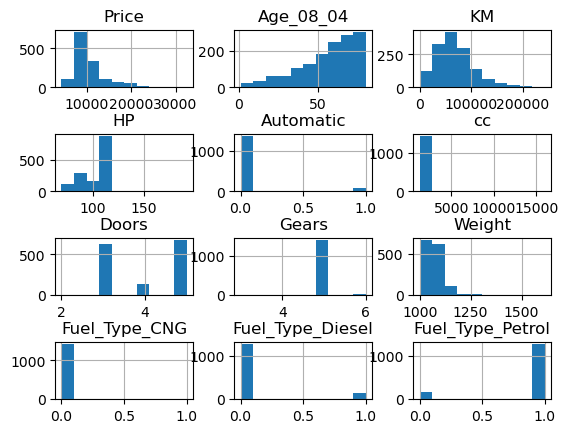

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

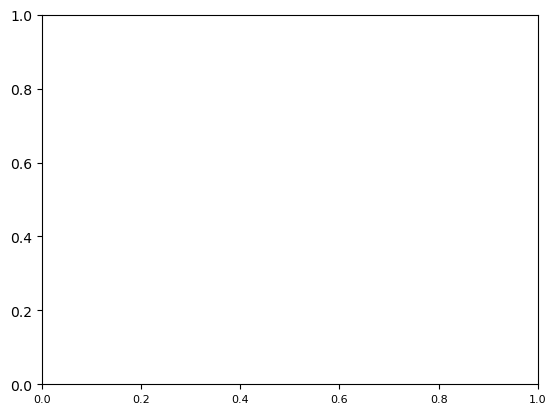

In [11]:
# Histogram

plt.figure(figsize= (12,5))
plt.tight_layout()
df.hist()
plt.subplots_adjust(hspace = 0.8 , wspace = 0.3)
plt.show()
plt.xticks(fontsize=8)

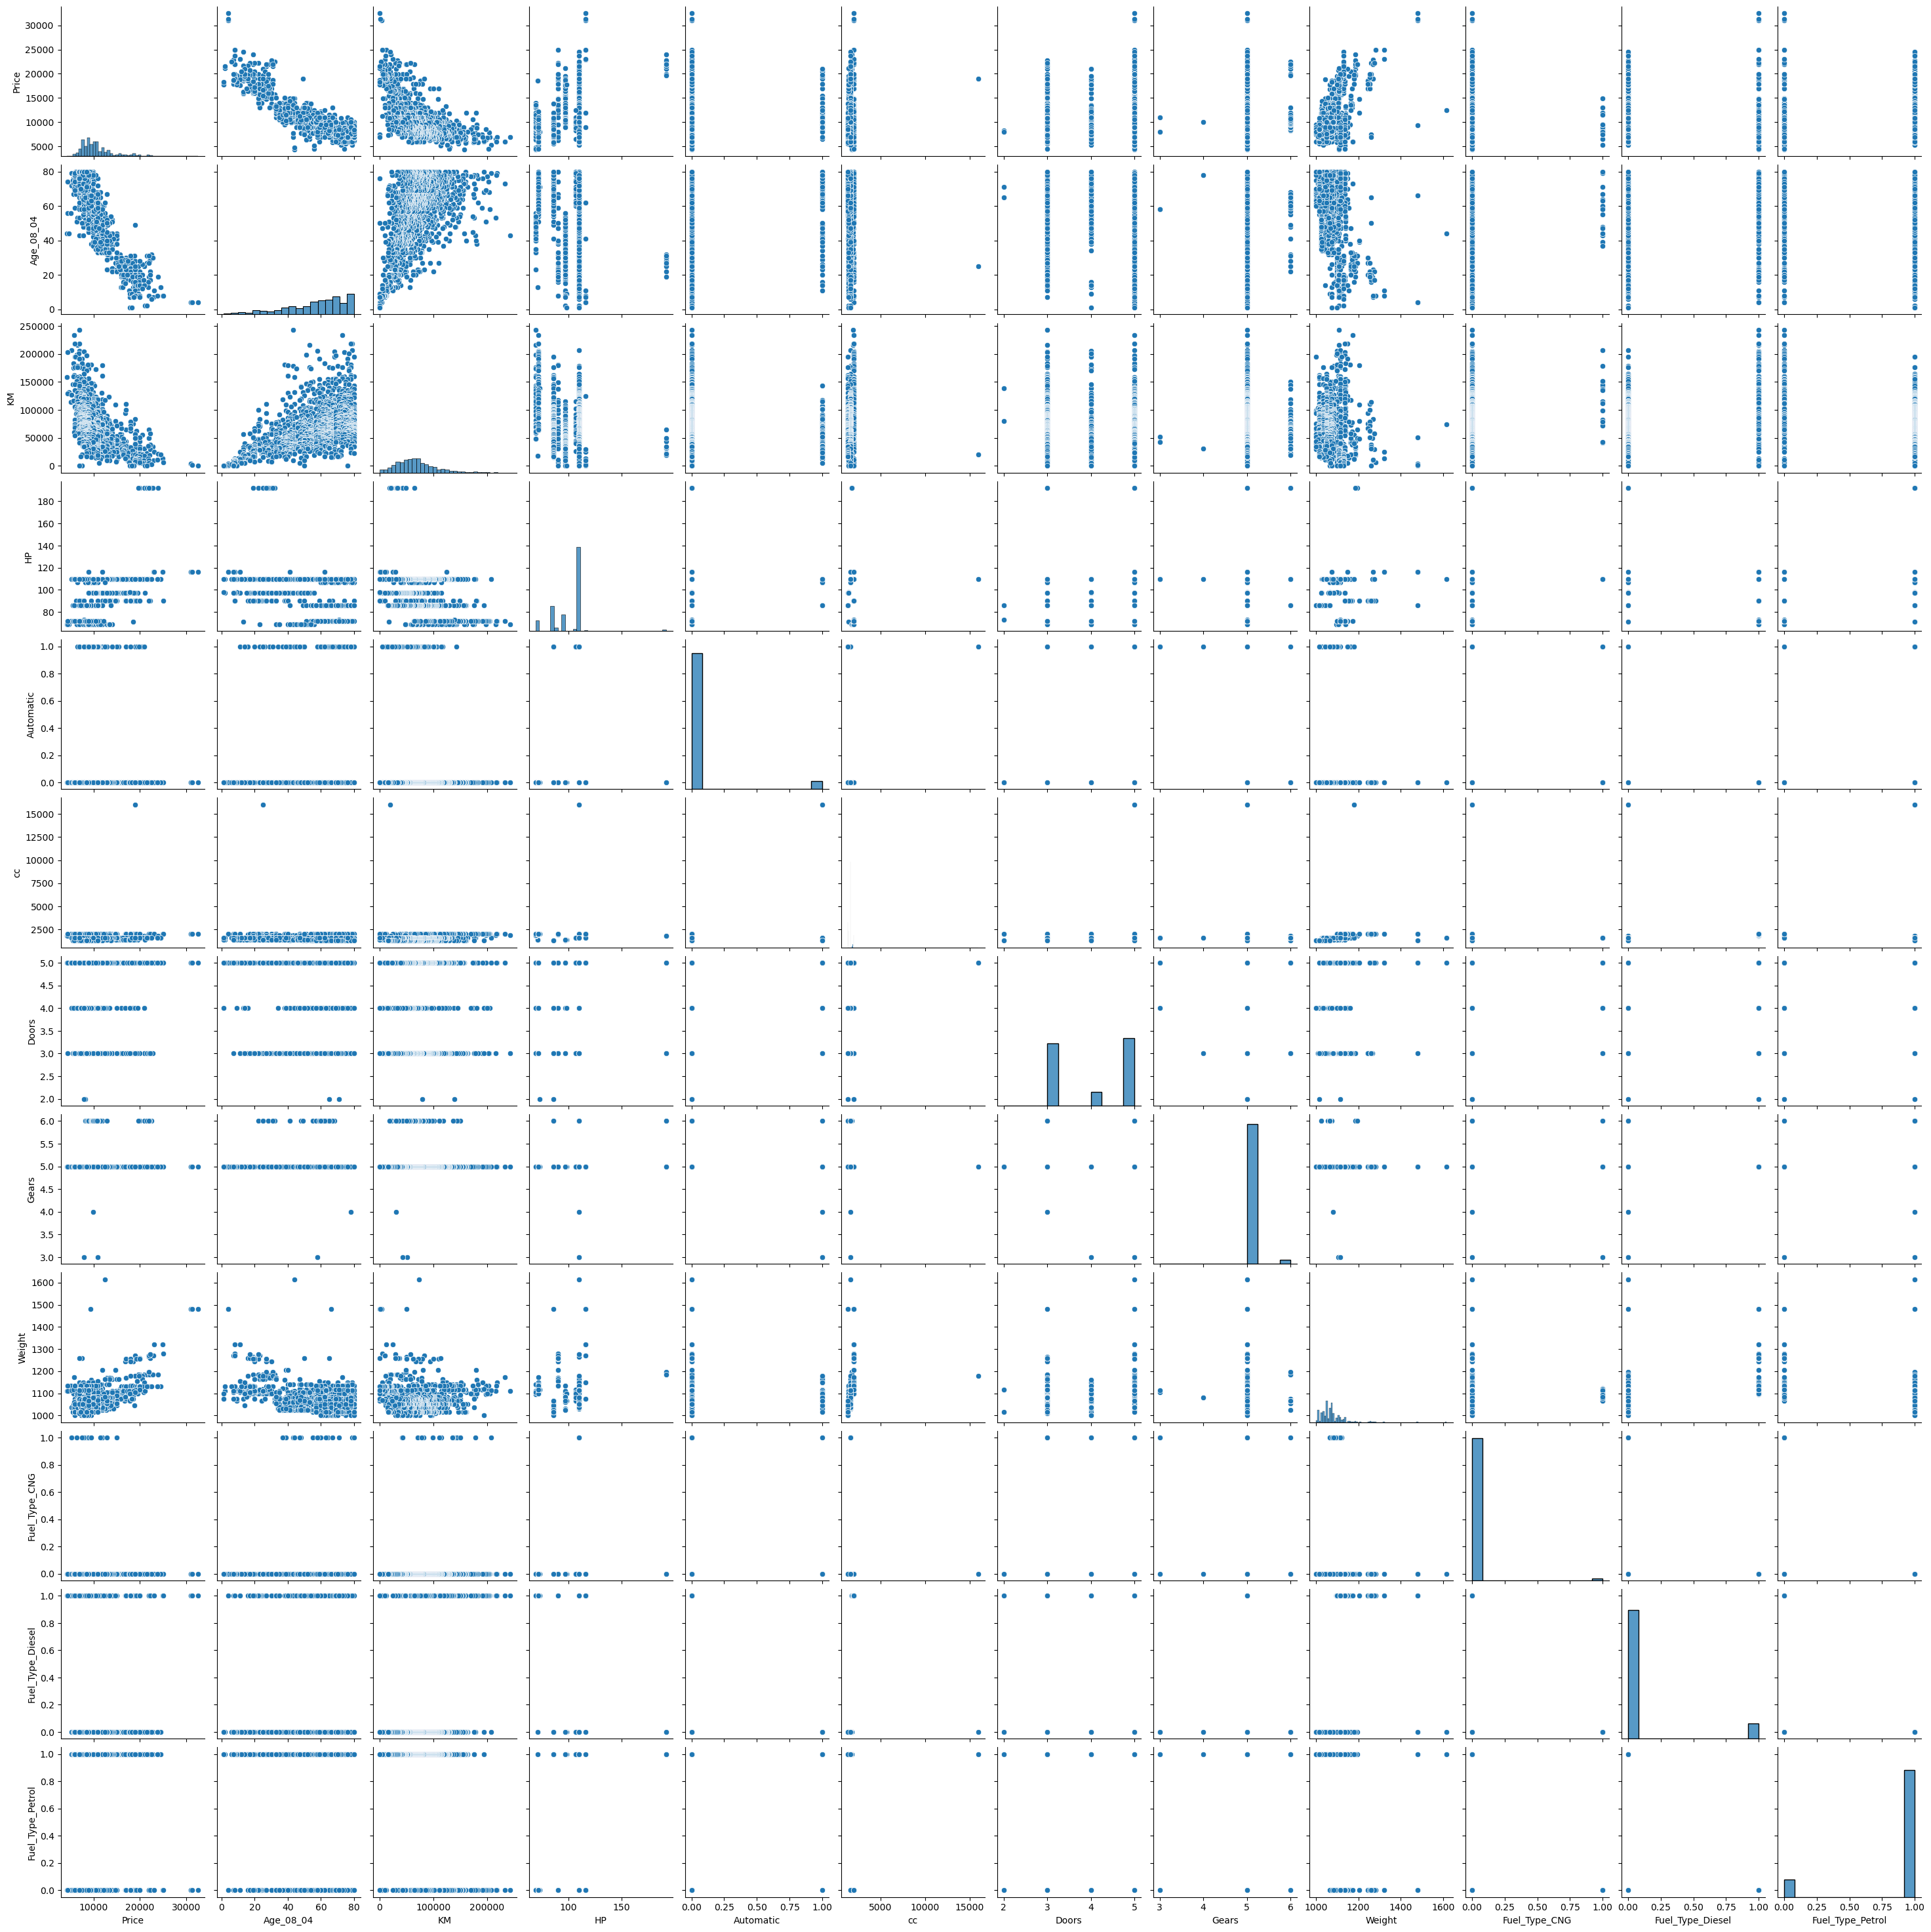

In [17]:
sns.pairplot(data=df)
plt.show()

In [18]:
df.dtypes

Price               int64
Age_08_04           int64
KM                  int64
HP                  int64
Automatic           int64
cc                  int64
Doors               int64
Gears               int64
Weight              int64
Fuel_Type_CNG       int64
Fuel_Type_Diesel    int64
Fuel_Type_Petrol    int64
dtype: object

In [14]:
df.corr()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
Price,1.000000,-0.876273,-0.569420,0.314134,0.033928,0.124375,0.183604,0.063831,0.575869,-0.039449,0.046612,-0.031356
Age_08_04,-0.876273,1.000000,0.504575,-0.155293,0.031354,-0.096549,-0.146929,-0.005629,-0.466484,0.002198,-0.093058,0.088169
KM,-0.569420,0.504575,1.000000,-0.332904,-0.082168,0.103822,-0.035193,0.014890,-0.023969,0.144013,0.407497,-0.437397
HP,0.314134,-0.155293,-0.332904,1.000000,0.013313,0.035207,0.091803,0.209642,0.087143,0.062203,-0.537116,0.492362
Automatic,0.033928,0.031354,-0.082168,0.013313,1.000000,0.066934,-0.027492,-0.098582,0.058499,0.001467,-0.084248,0.079997
cc,0.124375,-0.096549,0.103822,0.035207,0.066934,1.000000,0.079254,0.014732,0.335077,0.006019,0.326780,-0.314200
Doors,0.183604,-0.146929,-0.035193,0.091803,-0.027492,0.079254,1.000000,-0.160101,0.301734,0.009761,0.023538,-0.025746
Gears,0.063831,-0.005629,0.014890,0.209642,-0.098582,0.014732,-0.160101,1.000000,0.021238,-0.049548,-0.048706,0.063079
Weight,0.575869,-0.466484,-0.023969,0.087143,0.058499,0.335077,0.301734,0.021238,1.000000,0.053530,0.564649,-0.557315
Fuel_Type_CNG,-0.039449,0.002198,0.144013,0.062203,0.001467,0.006019,0.009761,-0.049548,0.053530,1.000000,-0.037964,-0.297688


In [15]:
# Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

x=df.drop(columns = ['Price'])
y=df['Price']
y

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1431     7500
1432    10845
1433     8500
1434     7250
1435     6950
Name: Price, Length: 1435, dtype: int64

In [16]:
x

,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23,46986,90,0,2000,3,5,1165,0,1,0
1,23,72937,90,0,2000,3,5,1165,0,1,0
2,24,41711,90,0,2000,3,5,1165,0,1,0
3,26,48000,90,0,2000,3,5,1165,0,1,0
4,30,38500,90,0,2000,3,5,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,0,1300,3,5,1025,0,0,1
1432,72,19000,86,0,1300,3,5,1015,0,0,1
1433,71,17016,86,0,1300,3,5,1015,0,0,1
1434,70,16916,86,0,1300,3,5,1015,0,0,1


In [17]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [18]:
xtrain.head()

,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
989,59,43818,110,0,1600,5,5,1070,0,0,1
907,65,58829,110,0,1600,3,5,1050,0,0,1
1318,78,67255,110,0,1600,5,5,1085,0,0,1
818,62,70500,110,0,1600,5,5,1035,0,0,1
661,65,111769,110,0,1600,3,6,1065,0,0,1


In [19]:
ytrain

989      9950
907      8950
1318     8500
818      8950
661      9750
        ...  
716      8750
906      9750
1097     7250
236     10950
1062     6750
Name: Price, Length: 1148, dtype: int64

# Model Building

In [20]:
model = smf.ols('Price~Age_08_04+KM+HP+Automatic+cc+Doors+Gears+Weight+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol',data=df).fit()

## 1. Resudal Plot

In [21]:
model.params

Intercept          -6895.217001
Age_08_04           -123.840430
KM                    -0.017416
HP                    23.314614
Automatic            303.253603
cc                    -0.052021
Doors                -29.884035
Gears                627.081986
Weight                20.706603
Fuel_Type_CNG      -2858.978150
Fuel_Type_Diesel   -2321.979227
Fuel_Type_Petrol   -1714.259624
dtype: float64

In [22]:
model.rsquared

np.float64(0.8637648551448405)

In [23]:
model.fittedvalues

0       16279.391959
1       15827.430557
2       16247.420682
3       15890.210892
4       15663.833741
            ...     
1431     8695.195996
1432     8143.498909
1433     8301.892590
1434     8427.474616
1435    10513.153028
Length: 1435, dtype: float64

In [24]:
model.resid

0      -2779.391959
1      -2077.430557
2      -2297.420682
3       -940.210892
4      -1913.833741
           ...     
1431   -1195.195996
1432    2701.501091
1433     198.107410
1434   -1177.474616
1435   -3563.153028
Length: 1435, dtype: float64

Text(0, 0.5, 'Residuals')

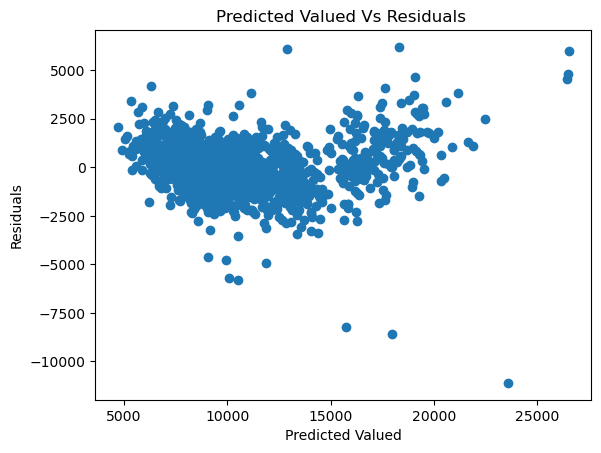

In [25]:
plt.scatter(model.fittedvalues,model.resid)
plt.title('Predicted Valued Vs Residuals ')
plt.xlabel('Predicted Valued')
plt.ylabel('Residuals')

In [26]:
import statsmodels.api as sm

##  2. QQPLOT 

In [27]:
model.params

Intercept          -6895.217001
Age_08_04           -123.840430
KM                    -0.017416
HP                    23.314614
Automatic            303.253603
cc                    -0.052021
Doors                -29.884035
Gears                627.081986
Weight                20.706603
Fuel_Type_CNG      -2858.978150
Fuel_Type_Diesel   -2321.979227
Fuel_Type_Petrol   -1714.259624
dtype: float64

In [28]:
model.fittedvalues

0       16279.391959
1       15827.430557
2       16247.420682
3       15890.210892
4       15663.833741
            ...     
1431     8695.195996
1432     8143.498909
1433     8301.892590
1434     8427.474616
1435    10513.153028
Length: 1435, dtype: float64

In [29]:
model.resid

0      -2779.391959
1      -2077.430557
2      -2297.420682
3       -940.210892
4      -1913.833741
           ...     
1431   -1195.195996
1432    2701.501091
1433     198.107410
1434   -1177.474616
1435   -3563.153028
Length: 1435, dtype: float64

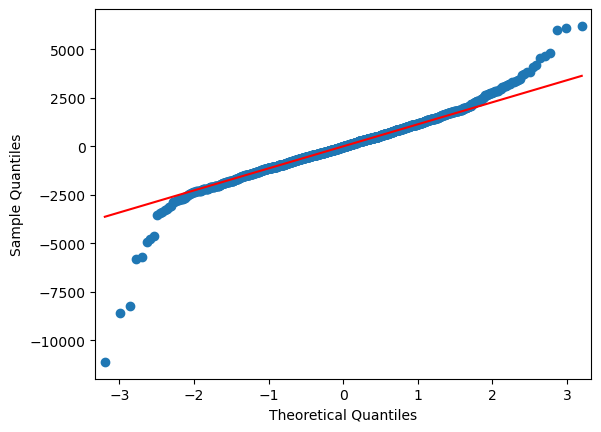

In [30]:
import statsmodels.api as sm

sm.qqplot(model.resid,line='q');

## 3. Residual vs Regressor

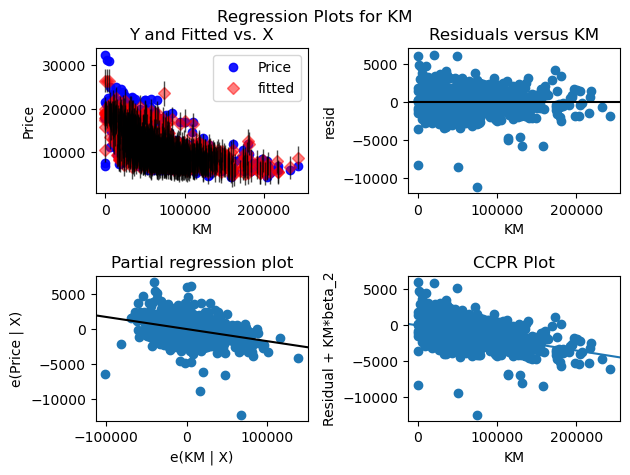

In [31]:
sm.graphics.plot_regress_exog(model,'KM');

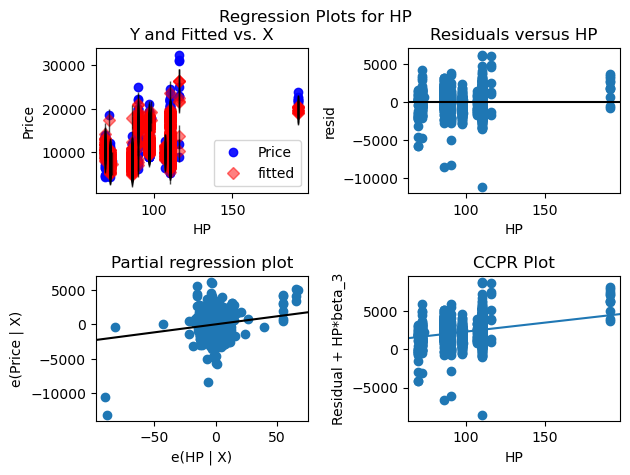

In [32]:
sm.graphics.plot_regress_exog(model,'HP');

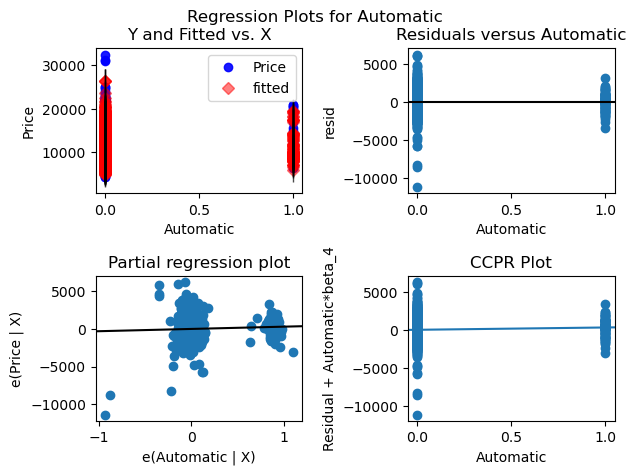

In [33]:
sm.graphics.plot_regress_exog(model,'Automatic');

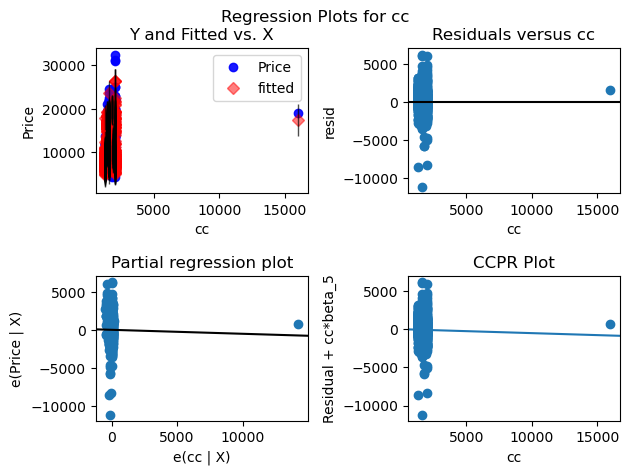

In [34]:
sm.graphics.plot_regress_exog(model,'cc');

In [ ]:
sm.graphics.plot_regress_exog(model,'Gears');

## Model Detection Diagnostics (checking Outliers or Influencers)
- Two Techniques : 1. Cook's Distance & 2. Leverage value

In [32]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c

array([4.20329555e-03, 2.12736364e-03, 2.95311457e-03, ...,
       1.24558008e-05, 4.30330817e-04, 7.04076283e-03])

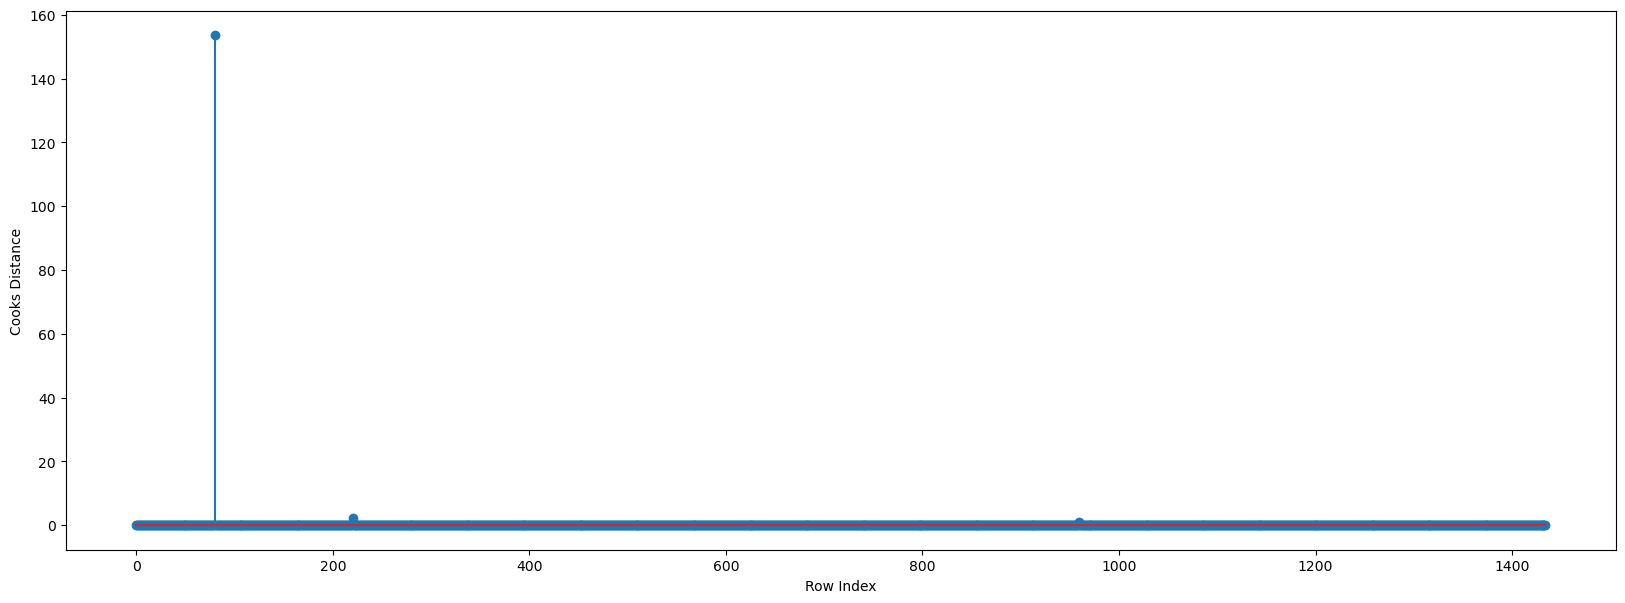

In [34]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [35]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(np.int64(80), np.float64(153.58892624761143))

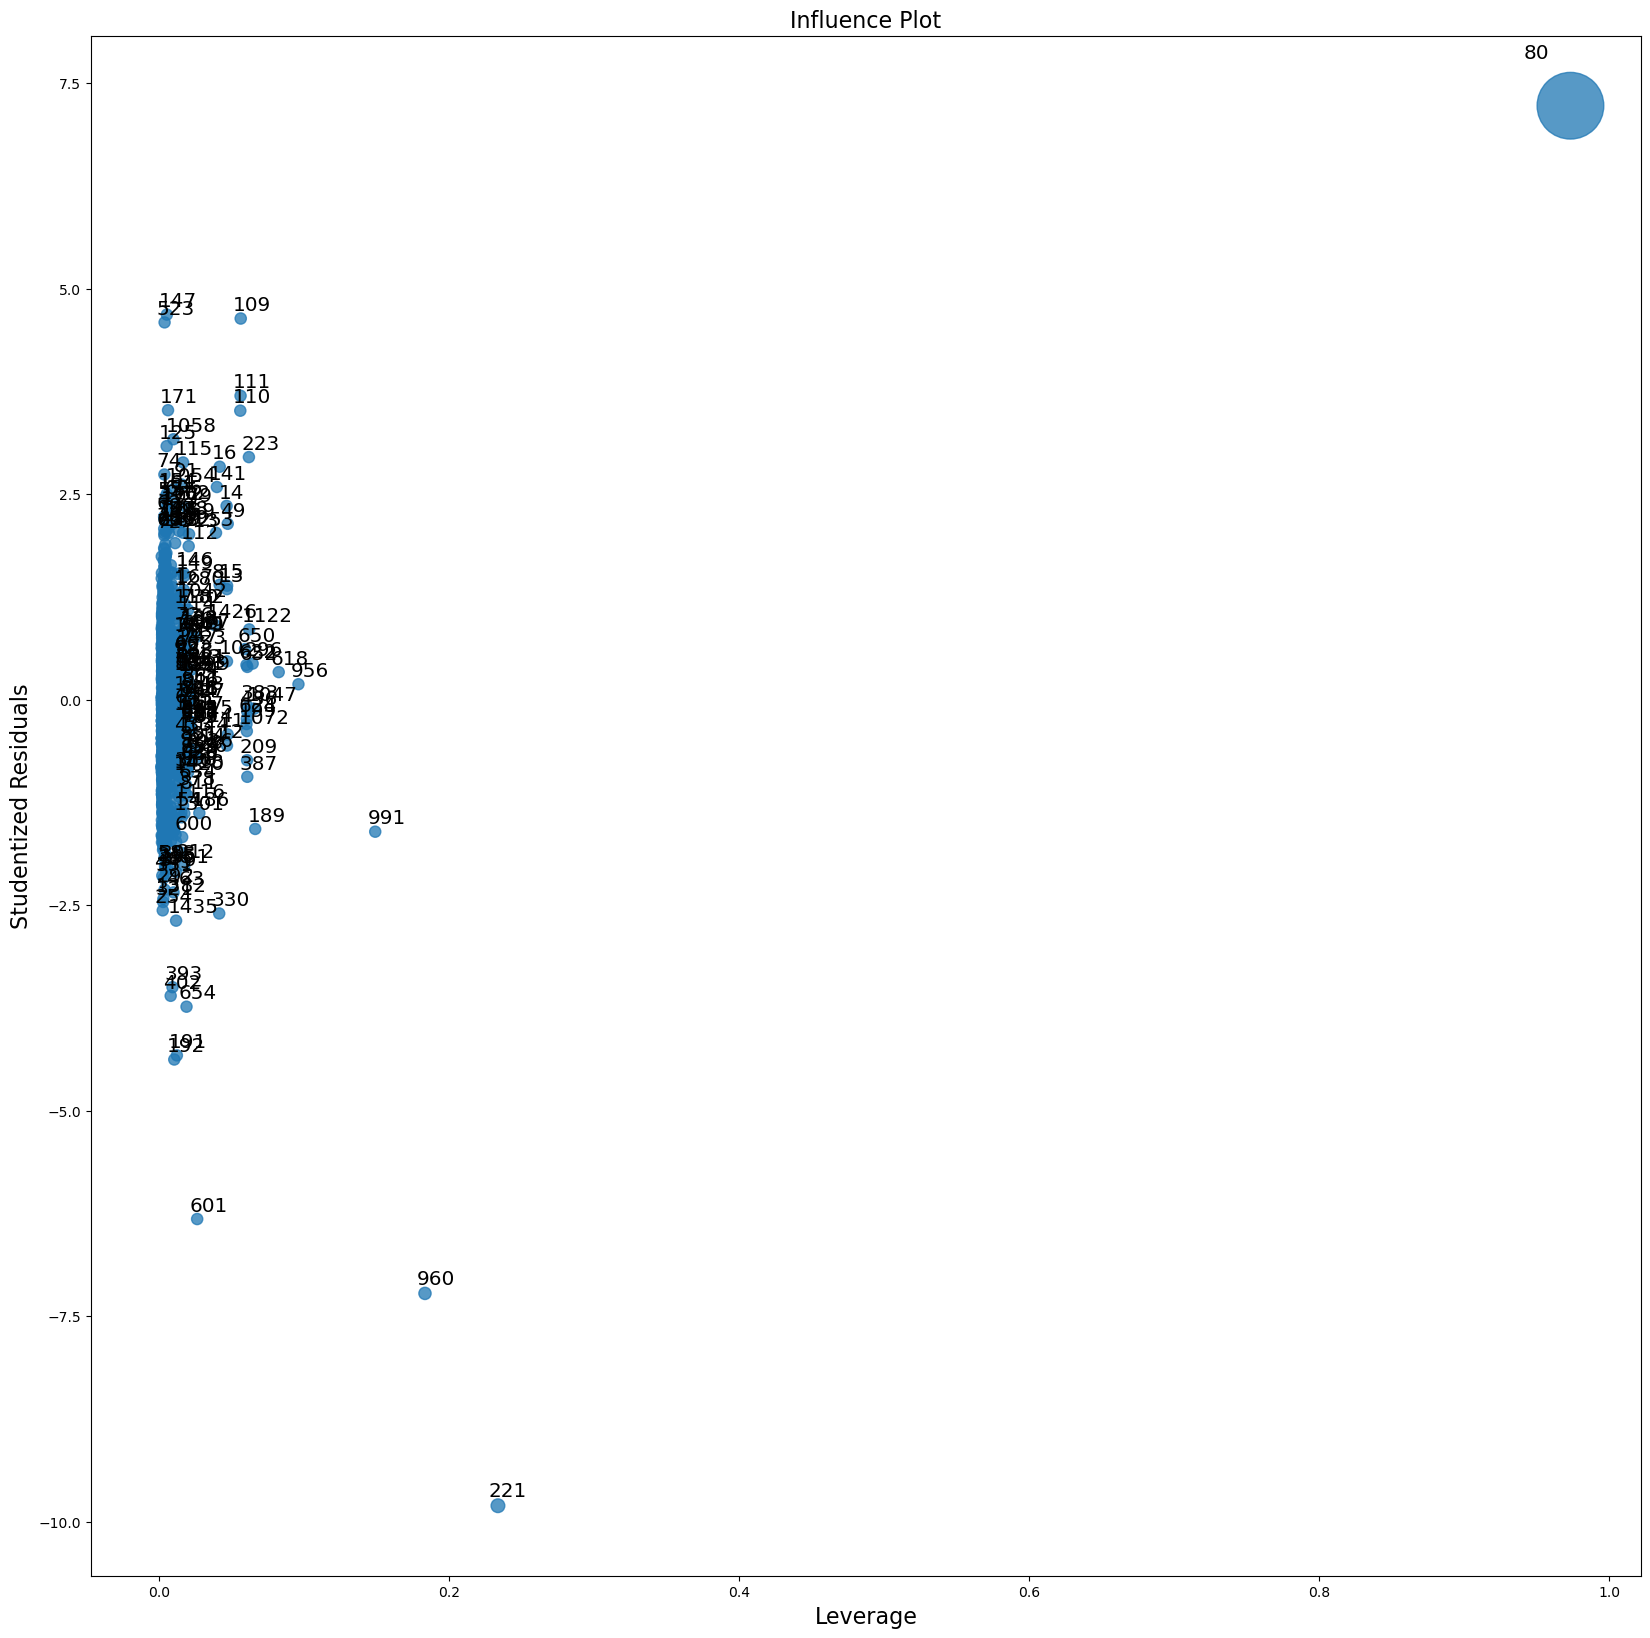

In [36]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax = ax)

In [38]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=df.shape[1]
n=df.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.02926829268292683

In [39]:
df[df.index.isin([80])] 

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
80,18950,25,20019,110,1,16000,5,4,5,1180,0,0,1


# Improving the Model

In [40]:
# Creating a copy of data so that original dataset is not affected
df_new=df.copy()
df_new

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,0,1,0
1,13750,23,72937,90,0,2000,3,4,5,1165,0,1,0
2,13950,24,41711,90,0,2000,3,4,5,1165,0,1,0
3,14950,26,48000,90,0,2000,3,4,5,1165,0,1,0
4,13750,30,38500,90,0,2000,3,4,5,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,0,0,1
1432,10845,72,19000,86,0,1300,3,4,5,1015,0,0,1
1433,8500,71,17016,86,0,1300,3,4,5,1015,0,0,1
1434,7250,70,16916,86,0,1300,3,4,5,1015,0,0,1


In [41]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
toyo5=df_new.drop(df_new.index[[80]],axis=0).reset_index(drop=True)
toyo5

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,0,1,0
1,13750,23,72937,90,0,2000,3,4,5,1165,0,1,0
2,13950,24,41711,90,0,2000,3,4,5,1165,0,1,0
3,14950,26,48000,90,0,2000,3,4,5,1165,0,1,0
4,13750,30,38500,90,0,2000,3,4,5,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,0,1300,3,4,5,1025,0,0,1
1430,10845,72,19000,86,0,1300,3,4,5,1015,0,0,1
1431,8500,71,17016,86,0,1300,3,4,5,1015,0,0,1
1432,7250,70,16916,86,0,1300,3,4,5,1015,0,0,1


# Model Deletion Diagnostics and Final Model

In [42]:
 while np.max(c)>0.5 :
    model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Weight',data=toyo5).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    toyo5=toyo5.drop(toyo5.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    toyo5
else:
    final_model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Weight',data=toyo5).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8876768823747953


In [43]:
if np.max(c)>0.5:
    model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Weight',data=toyo5).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    toyo5=toyo5.drop(toyo5.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    toyo5 
elif np.max(c)<0.5:
    final_model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Weight',data=toyo5).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8876768823747953


In [44]:
final_model.rsquared

np.float64(0.8876768823747953)

In [45]:
toyo5

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,0,1,0
1,13750,23,72937,90,0,2000,3,4,5,1165,0,1,0
2,13950,24,41711,90,0,2000,3,4,5,1165,0,1,0
3,14950,26,48000,90,0,2000,3,4,5,1165,0,1,0
4,13750,30,38500,90,0,2000,3,4,5,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426,7500,69,20544,86,0,1300,3,4,5,1025,0,0,1
1427,10845,72,19000,86,0,1300,3,4,5,1015,0,0,1
1428,8500,71,17016,86,0,1300,3,4,5,1015,0,0,1
1429,7250,70,16916,86,0,1300,3,4,5,1015,0,0,1


# Model Prediction

In [46]:
# say New data for prediction is
new_data=pd.DataFrame({'Age_08_04':12,"KM":40000,"HP":80,"cc":1300,"Doors":4,"Gears":5,"Weight":1012},index=[0])
new_data

,Age_08_04,KM,HP,cc,Doors,Gears,Weight
0,12,40000,80,1300,4,5,1012


In [47]:
# Manual Prediction of Price
final_model.predict(new_data)

0    14320.039208
dtype: float64

In [48]:
# Automatic Prediction of Price with 90.02% accurcy
pred_y=final_model.predict(toyo5)
pred_y

0       16198.360543
1       15746.702250
2       16179.666315
3       15849.207301
4       15740.147564
            ...     
1426     9132.186959
1427     8492.340356
1428     8637.372204
1429     8749.614401
1430    11118.305918
Length: 1431, dtype: float64

# Lasso and Ridge Method

In [49]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
# 1. Lasso Regression
# Creating a Lasso regression model with alpha=0.1 (regularization strength)
lasso_model = Lasso(alpha=0.1)

# Fitting the model
lasso_model.fit(xtrain, ytrain)

# Making predictions
y_pred_lasso = lasso_model.predict(xtest)

# Calculating Mean Squared Error for Lasso
lasso_mse = mean_squared_error(ytest, y_pred_lasso)

print("Lasso Regression Mean Squared Error:", lasso_mse)

Lasso Regression Mean Squared Error: 13710736.834395282


In [50]:
# 2. Ridge Regression
# Creating a Ridge regression model with alpha=1.0 (regularization strength)
ridge_model = Ridge(alpha=1.0)

# Fitting the model
ridge_model.fit(xtrain, ytrain)

# Making predictions
y_pred_ridge = ridge_model.predict(xtest)

# Calculating Mean Squared Error for Ridge
ridge_mse = mean_squared_error(ytest, y_pred_ridge)

print("Ridge Regression Mean Squared Error:", ridge_mse)

Ridge Regression Mean Squared Error: 12308890.43978695


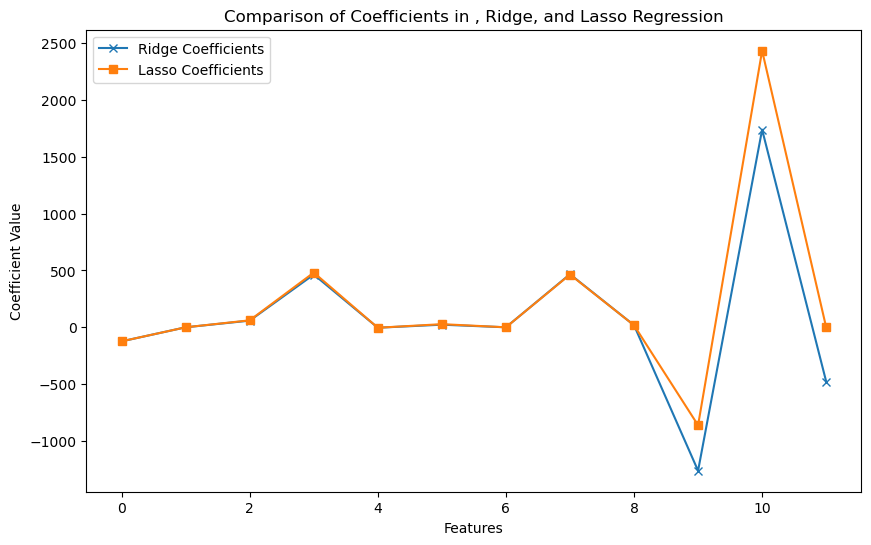

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(ridge_model.coef_, label='Ridge Coefficients', marker='x')
plt.plot(lasso_model.coef_, label='Lasso Coefficients', marker='s')
plt.title("Comparison of Coefficients in , Ridge, and Lasso Regression")
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.legend()
plt.show()

# Interview Questions


## 1.What is Normalization & Standardization and how is it helpful?
- Normalization and Standardization are two techniques used in data preprocessing, especially in machine learning, to bring all features to a similar scale or range. When to use Normalisation :- When features have different ranges (e.g., one in thousands, another in decimals). When algorithms like KNN or Neural Networks are sensitive to the scale of data.
- When to use Standardization :- When the algorithm assumes normally distributed data (e.g., Linear Regression, Logistic Regression). When the scale doesn’t matter as much, but the distribution does.

These techniques are helpful when - Improved Algorithm Performance: Algorithms like gradient descent converge faster when features are on a similar scale. Prevents Bias: Features with larger scales won’t dominate over smaller-scaled ones. Better Interpretability: Scaling ensures that distance-based metrics (used in clustering or classification) work correctly. Consistency: It creates consistency in how features are treated.

## 2.What techniques can be used to address multicollinearity in multiple linear regression?
- Multicollinearity occurs when predictor variables in multiple linear regression are highly correlated, leading to unstable coefficients and difficulty in interpretation. To address it: Remove Highly Correlated Variables using a correlation matrix or Variance Inflation Factor (VIF). Combine Predictors (e.g., using Principal Component Analysis). Use Regularization Techniques like Ridge or Lasso Regression to reduce the impact of multicollinearity. Increase Sample Size if feasible to stabilize estimates. Apply domain knowledge to select the most relevant predictors. These techniques improve model stability and interpretability.